<h2> Project Milestone 4: Visualizations with Python </h2>

In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ( confusion_matrix, accuracy_score,
precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt


In [3]:
#Importing data into pandas
df_student_mental_raw = pd.read_csv("C:/Users/Dimple/Desktop/Data alaystics/Python/Project/students_mental_health_survey.csv")
df_student_mental_raw.head(10)

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
5,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus
6,18,Law,Male,3.65,2,2,5,Good,Moderate,Average,Moderate,Single,Never,Never,No,No,4,Moderate,20,Off-Campus
7,21,Business,Female,3.40,0,3,3,Average,Low,Average,Low,Married,Never,Never,Yes,No,3,Moderate,23,On-Campus
8,24,Medical,Male,3.80,3,2,1,Poor,Low,Average,Moderate,Single,Frequently,Never,Yes,No,2,Low,28,On-Campus
9,19,Engineering,Female,3.05,2,5,0,Average,Moderate,Good,Low,In a Relationship,NaN,Occasionally,Yes,No,1,Moderate,27,Off-Campus


In [4]:
#Checking the Dimension of the data
df_student_mental_raw.shape

(7022, 20)

In [5]:
#Checking the null values
df_student_mental_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [6]:
# Getting counts of null values
df_student_mental_raw.isnull().sum()

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

<h2> There are null values in CGPA and Substance_Use </h2>

In [7]:
#Changing the object data type to appropriate ones
df_student_mental_raw.Course = df_student_mental_raw.Course.astype('string')
df_student_mental_raw.Gender = df_student_mental_raw.Gender.astype('string')
df_student_mental_raw.Sleep_Quality = df_student_mental_raw.Sleep_Quality.astype('string')
df_student_mental_raw.Physical_Activity = df_student_mental_raw.Physical_Activity.astype('string')
df_student_mental_raw.Diet_Quality = df_student_mental_raw.Diet_Quality.astype('string')
df_student_mental_raw.Social_Support = df_student_mental_raw.Social_Support.astype('string')
df_student_mental_raw.Relationship_Status = df_student_mental_raw.Relationship_Status.astype('string')
df_student_mental_raw.Substance_Use = df_student_mental_raw.Substance_Use.astype('string')
df_student_mental_raw.Counseling_Service_Use = df_student_mental_raw.Counseling_Service_Use.astype('string')
df_student_mental_raw.Family_History = df_student_mental_raw.Family_History.astype('string')
df_student_mental_raw.Chronic_Illness = df_student_mental_raw.Chronic_Illness.astype('string')
df_student_mental_raw.Extracurricular_Involvement = df_student_mental_raw.Extracurricular_Involvement.astype('string')
df_student_mental_raw.Residence_Type = df_student_mental_raw.Residence_Type.astype('string')
# Checking the data types 
df_student_mental_raw.dtypes

Age                                     int64
Course                         string[python]
Gender                         string[python]
CGPA                                  float64
Stress_Level                            int64
Depression_Score                        int64
Anxiety_Score                           int64
Sleep_Quality                  string[python]
Physical_Activity              string[python]
Diet_Quality                   string[python]
Social_Support                 string[python]
Relationship_Status            string[python]
Substance_Use                  string[python]
Counseling_Service_Use         string[python]
Family_History                 string[python]
Chronic_Illness                string[python]
Financial_Stress                        int64
Extracurricular_Involvement    string[python]
Semester_Credit_Load                    int64
Residence_Type                 string[python]
dtype: object

<h2> Replacing null values in column CGPA </h2>

In [8]:
df_student_mental_raw.Course.value_counts()

Course
Medical             2105
Law                 1385
Engineering         1072
Computer Science    1028
Business             717
Others               715
Name: count, dtype: Int64

In [9]:
#Finding means of different course types
course_Others_mean = df_student_mental_raw.query("Course == 'Others'")['CGPA'].mean()
course_Law_mean = df_student_mental_raw.query("Course == 'Law'")['CGPA'].mean()
course_Engineering_mean = df_student_mental_raw.query("Course == 'Engineering'")['CGPA'].mean()
course_CS_mean = df_student_mental_raw.query("Course == 'Computer Science'")['CGPA'].mean()
course_Business_mean = df_student_mental_raw.query("Course == 'Business'")['CGPA'].mean()
course_Medical_mean = df_student_mental_raw.query("Course == 'Medical'")['CGPA'].mean()


In [10]:
# Replacing the null values in CGPA column
df_student_mental_raw['CGPA'].mask(
    (df_student_mental_raw['Course'] == 'Engineering') & (df_student_mental_raw['CGPA'].isnull()),round(course_Engineering_mean,2),
    inplace=True
)

df_student_mental_raw['CGPA'].mask(
    (df_student_mental_raw['Course'] == 'Law') & (df_student_mental_raw['CGPA'].isnull()),round(course_Law_mean,2),
    inplace=True
)

df_student_mental_raw['CGPA'].mask(
    (df_student_mental_raw['Course'] == 'Others') & (df_student_mental_raw['CGPA'].isnull()),round(course_Others_mean,2),
    inplace=True
)

df_student_mental_raw['CGPA'].mask(
    (df_student_mental_raw['Course'] == 'Computer Science') & (df_student_mental_raw['CGPA'].isnull()),round(course_CS_mean,2),
    inplace=True
)

df_student_mental_raw['CGPA'].mask(
    (df_student_mental_raw['Course'] == 'Business') & (df_student_mental_raw['CGPA'].isnull()),round(course_Business_mean,2),
    inplace=True
)

df_student_mental_raw['CGPA'].mask(
    (df_student_mental_raw['Course'] == 'Medical') & (df_student_mental_raw['CGPA'].isnull()),round(course_Medical_mean,2),
    inplace=True
)


<h2> Replacing the null values in column Substance_Use </h2>

In [11]:
df_student_mental_raw['Substance_Use'].value_counts()

Substance_Use
Never           5903
Occasionally     699
Frequently       405
Name: count, dtype: Int64

In [12]:
df_student_mental_raw.Substance_Use.fillna(value='Never', inplace=True)


<h2> Re checking weather null values are removed or not </h2>

In [13]:
df_student_mental_raw.isnull().sum()

Age                            0
Course                         0
Gender                         0
CGPA                           0
Stress_Level                   0
Depression_Score               0
Anxiety_Score                  0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Relationship_Status            0
Substance_Use                  0
Counseling_Service_Use         0
Family_History                 0
Chronic_Illness                0
Financial_Stress               0
Extracurricular_Involvement    0
Semester_Credit_Load           0
Residence_Type                 0
dtype: int64

In [14]:
df_student_mental_transformed = df_student_mental_raw

<h2>Getting descriptive statistics for all numerical columns</h2>

In [15]:
df_student_mental_transformed.describe()

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
count,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000
mean,23.003418,3.491269,2.427941,2.254486,2.300484,2.453005,22.010538
std,3.853978,0.287175,1.638408,1.625193,1.624305,1.708995,4.358380
min,18.000000,2.440000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,20.000000,3.290000,1.000000,1.000000,1.000000,1.000000,18.000000
50%,22.000000,3.500000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,25.000000,3.700000,4.000000,3.000000,4.000000,4.000000,26.000000
max,35.000000,4.000000,5.000000,5.000000,5.000000,5.000000,29.000000


<h2> Getting the value_counts of all category columns </h2>

In [16]:
#Course column
df_student_mental_transformed['Course'].value_counts()

Course
Medical             2105
Law                 1385
Engineering         1072
Computer Science    1028
Business             717
Others               715
Name: count, dtype: Int64

In [17]:
#Gender column
df_student_mental_transformed['Gender'].value_counts()

Gender
Male      3547
Female    3475
Name: count, dtype: Int64

In [18]:
#Sleep_Quality column
df_student_mental_transformed['Sleep_Quality'].value_counts()

Sleep_Quality
Good       3589
Average    2735
Poor        698
Name: count, dtype: Int64

In [19]:
#Physical_Activity column
df_student_mental_transformed['Physical_Activity'].value_counts()

Physical_Activity
Moderate    3521
Low         2091
High        1410
Name: count, dtype: Int64

In [20]:
#Diet_Quality column
df_student_mental_transformed['Diet_Quality'].value_counts()

Diet_Quality
Average    4268
Good       1385
Poor       1369
Name: count, dtype: Int64

In [21]:
#Social_Support column
df_student_mental_transformed['Social_Support'].value_counts()

Social_Support
Moderate    3470
High        2176
Low         1376
Name: count, dtype: Int64

In [22]:
#Substance_Use column
df_student_mental_transformed['Substance_Use'].value_counts()

Substance_Use
Never           5918
Occasionally     699
Frequently       405
Name: count, dtype: Int64

In [23]:
#Counseling_Service_Use column
df_student_mental_transformed['Counseling_Service_Use'].value_counts()

Counseling_Service_Use
Never           4263
Occasionally    2081
Frequently       678
Name: count, dtype: Int64

In [24]:
#Family_History column
df_student_mental_transformed['Family_History'].value_counts()

Family_History
No     4866
Yes    2156
Name: count, dtype: Int64

In [25]:
#Chronic_Illness column
df_student_mental_transformed['Chronic_Illness'].value_counts()

Chronic_Illness
No     6678
Yes     344
Name: count, dtype: Int64

In [26]:
#Extracurricular_Involvement Column
df_student_mental_transformed['Extracurricular_Involvement'].value_counts()

Extracurricular_Involvement
Moderate    3440
Low         2164
High        1418
Name: count, dtype: Int64

In [27]:
#Residence_Type column
df_student_mental_transformed['Residence_Type'].value_counts()

Residence_Type
On-Campus      2815
Off-Campus     2788
With Family    1419
Name: count, dtype: Int64

In [71]:
#Residence_Type column
df_student_mental_transformed['Anxiety_Score'].value_counts()

Anxiety_Score
3    1429
2    1297
1    1270
0    1243
4     912
5     871
Name: count, dtype: int64

In [72]:
# Correlation matrix for numerical columns
df_student_final[['Age','CGPA','Stress_Level','Depression_Score','Semester_Credit_Load','Anxiety_Score','Financial_Stress']].corr()

KeyError: "['Anxiety_Score'] not in index"

<Axes: >

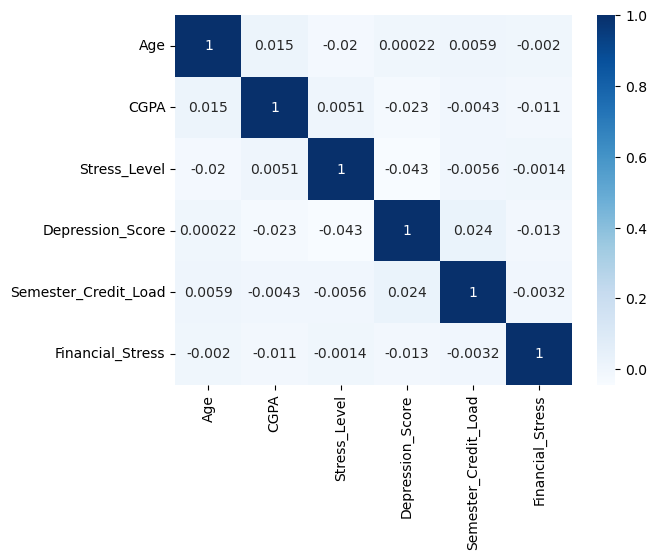

In [31]:
# Heat map for numerical columns
sns.heatmap(data=df_student_final[['Age','CGPA','Stress_Level','Depression_Score','Semester_Credit_Load','Financial_Stress']].corr(),annot=True,cmap='Blues')

<h2> Histograms for numerical columns </h2>

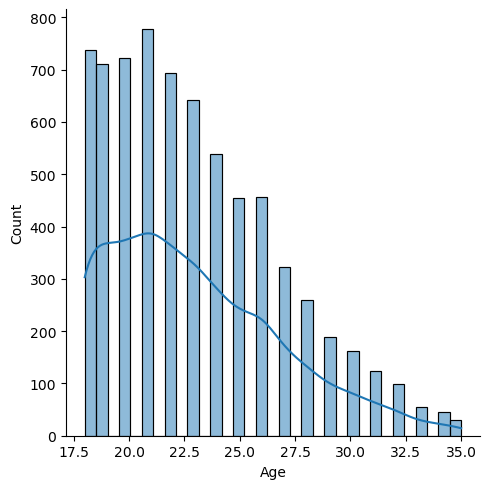

In [32]:
#Using distplot for age column
sns.displot(data=df_student_final, kind='hist', x='Age', kde=True)

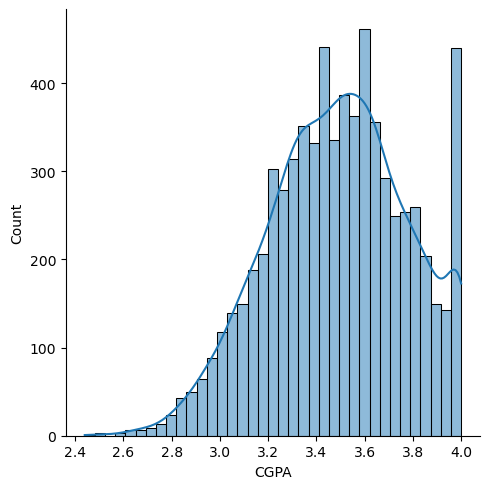

In [33]:
#Using distplot for CGPA column
sns.displot(data=df_student_final, kind='hist', x='CGPA', kde=True)

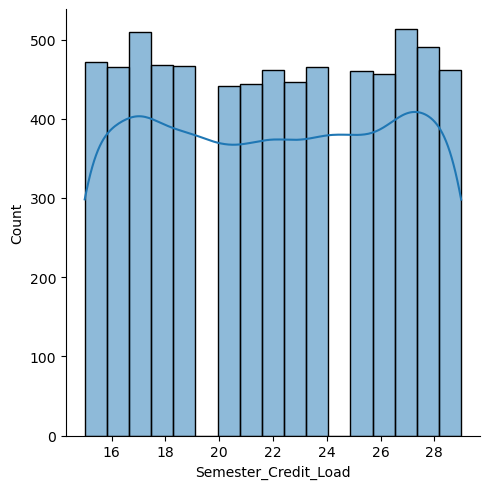

In [34]:
#Using distplot for Semester_Credit_Load column
sns.displot(data=df_student_final, kind='hist', x='Semester_Credit_Load', kde=True)

<h2> Box Plots for finding outliers </h2>

<Axes: >

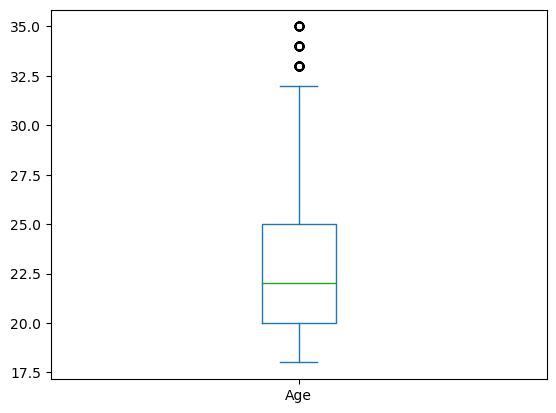

In [35]:
#Box plot for Age Column
df_student_final[['Age']].plot.box()

<Axes: >

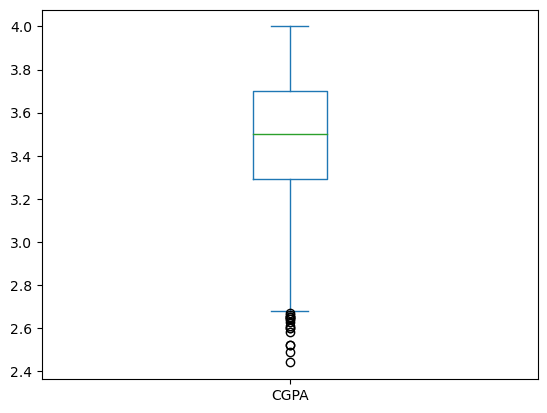

In [36]:
#Box plot for CGPA Column
df_student_final[['CGPA']].plot.box()

<Axes: >

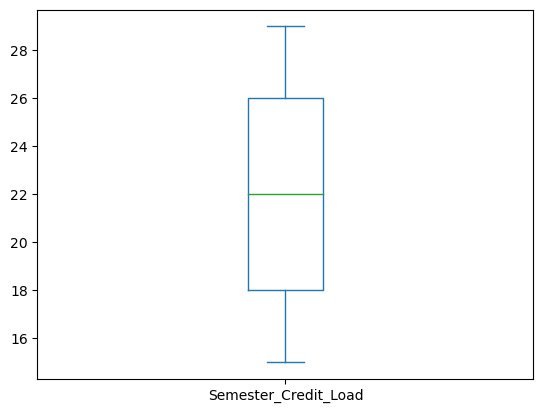

In [37]:
#Box plot for CGPA Column
df_student_final[['Semester_Credit_Load']].plot.box()

<h2> Bar graph for all categorical columns </h2>

<Axes: xlabel='Sleep_Quality', ylabel='count'>

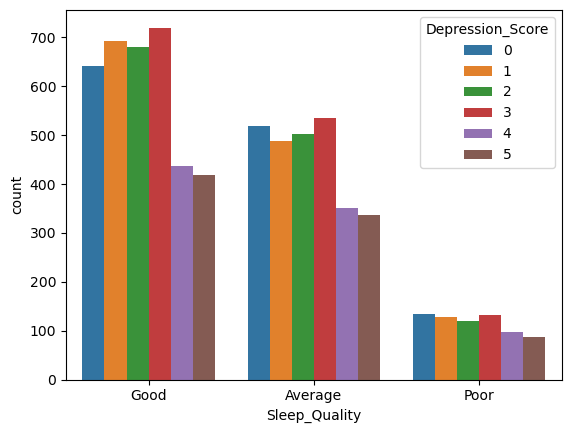

In [38]:
#Bar plot for Sleep_Quality categorical columns
sns.countplot(x='Sleep_Quality', hue='Depression_Score',data=df_student_final)

<Axes: xlabel='count', ylabel='Course'>

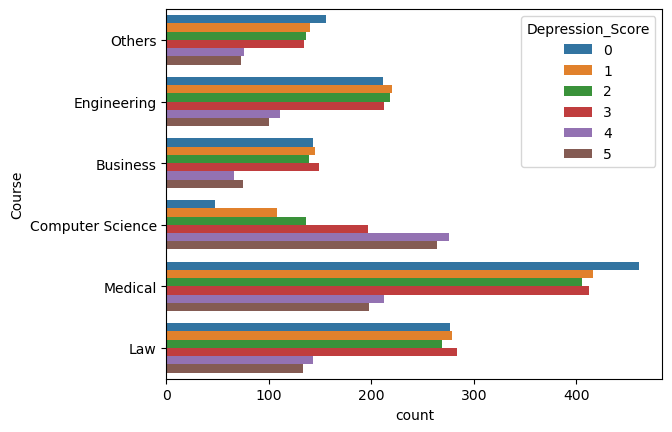

In [39]:
#Bar plot for Course categorical columns
sns.countplot(y='Course', hue='Depression_Score',data=df_student_final)

<Axes: xlabel='Physical_Activity', ylabel='count'>

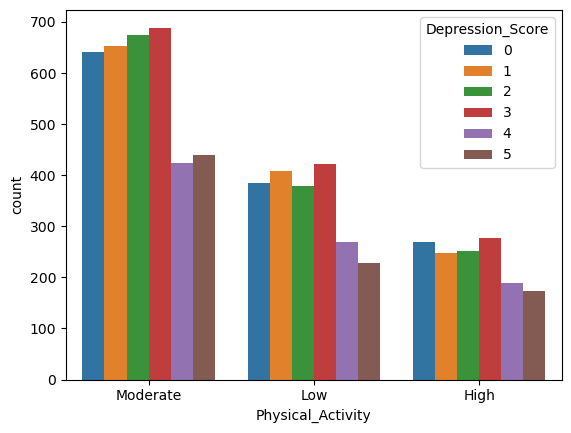

In [40]:
#Bar plot for Physical_Activity categorical columns
sns.countplot(x='Physical_Activity', hue='Depression_Score',data=df_student_final)

<Axes: xlabel='Diet_Quality', ylabel='count'>

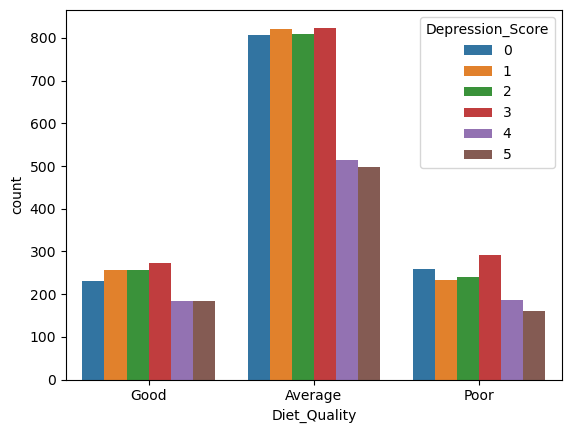

In [41]:
#Bar plot for Diet_Quality categorical columns
sns.countplot(x='Diet_Quality', hue='Depression_Score',data=df_student_final)

<Axes: xlabel='Social_Support', ylabel='count'>

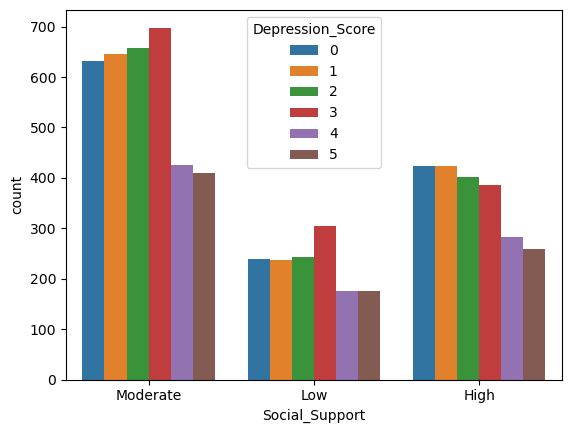

In [42]:
#Bar plot for Social_Support categorical columns
sns.countplot(x='Social_Support', hue='Depression_Score',data=df_student_final)

<Axes: xlabel='Relationship_Status', ylabel='count'>

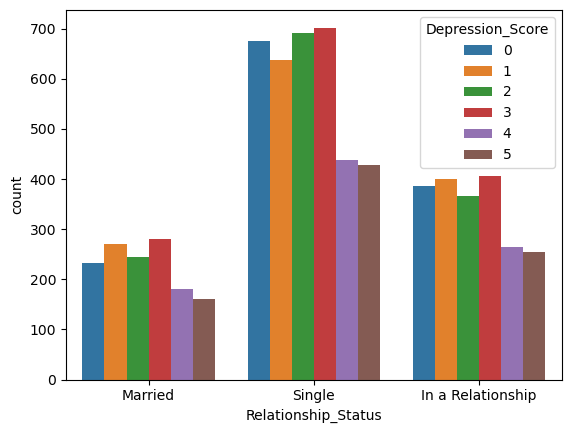

In [43]:
#Bar plot for Relationship_Status categorical columns
sns.countplot(x='Relationship_Status', hue='Depression_Score',data=df_student_final)

<Axes: xlabel='Substance_Use', ylabel='count'>

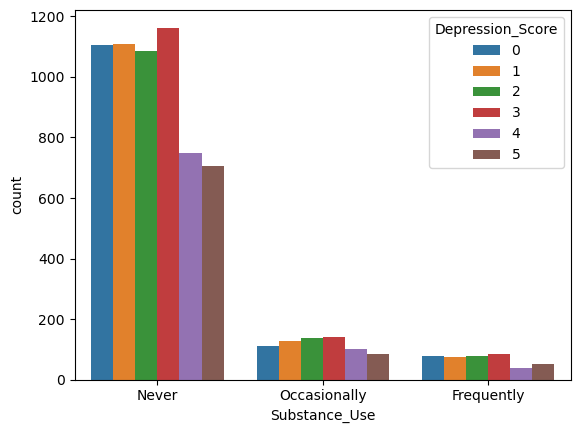

In [44]:
#Bar plot for Sleep_Quality categorical columns
sns.countplot(x='Substance_Use', hue='Depression_Score',data=df_student_final)

<Axes: xlabel='Counseling_Service_Use', ylabel='count'>

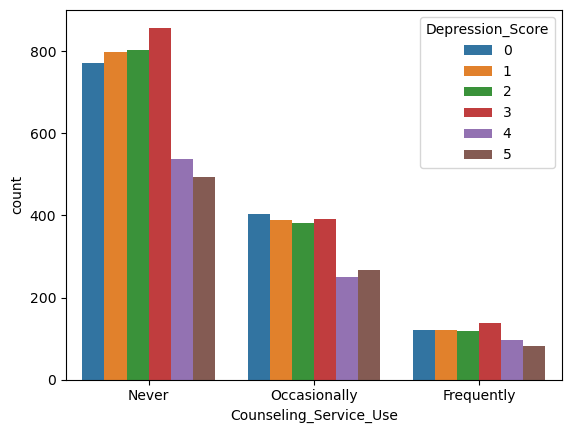

In [45]:
#Bar plot for Counseling_Service_Use categorical columns
sns.countplot(x='Counseling_Service_Use', hue='Depression_Score',data=df_student_final)

<Axes: xlabel='Family_History', ylabel='count'>

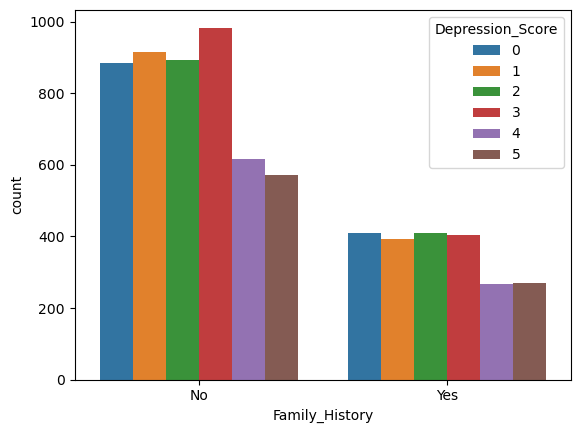

In [46]:
#Bar plot for Family_History categorical columns
sns.countplot(x='Family_History', hue='Depression_Score',data=df_student_final)

<Axes: xlabel='Chronic_Illness', ylabel='count'>

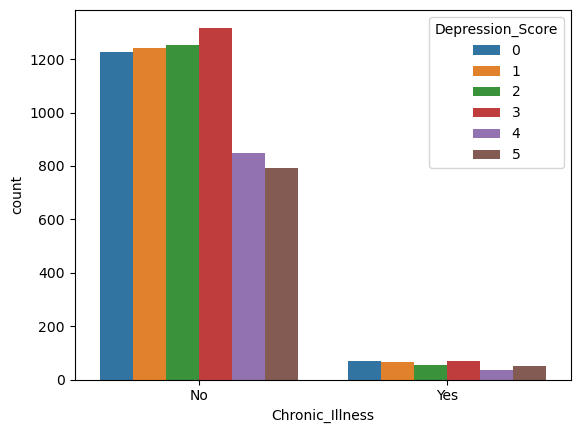

In [47]:
#Bar plot for Chronic_Illness categorical columns
sns.countplot(x='Chronic_Illness', hue='Depression_Score',data=df_student_final)

<Axes: xlabel='Extracurricular_Involvement', ylabel='count'>

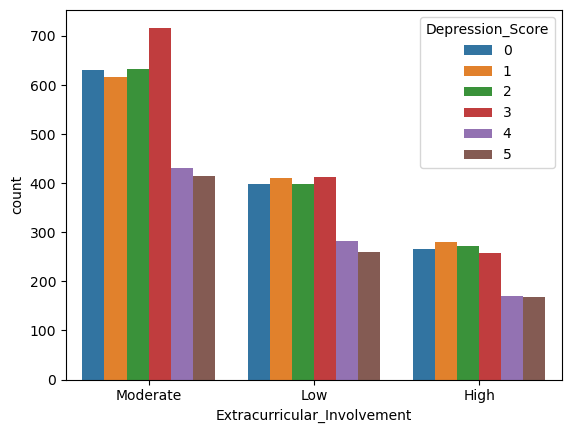

In [48]:
#Bar plot for Extracurricular_Involvement categorical columns
sns.countplot(x='Extracurricular_Involvement', hue='Depression_Score',data=df_student_final)

<Axes: xlabel='Residence_Type', ylabel='count'>

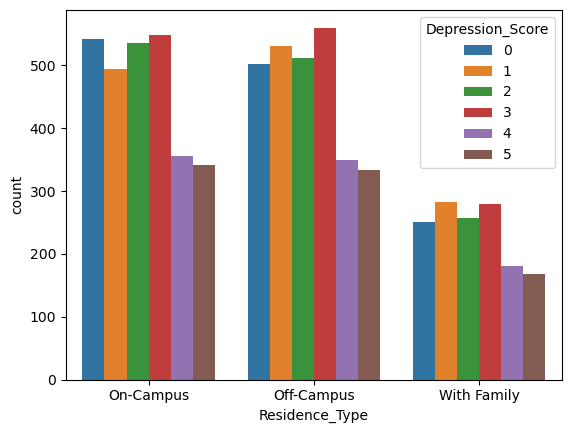

In [49]:
#Bar plot for Residence_Type categorical columns
sns.countplot(x='Residence_Type', hue='Depression_Score',data=df_student_final)

In [50]:
df_student_final.head(10)

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,Average,Low,Average,Moderate,Single,Never,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
5,21,Medical,Female,3.35,2,4,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus
6,18,Law,Male,3.65,2,2,Good,Moderate,Average,Moderate,Single,Never,Never,No,No,4,Moderate,20,Off-Campus
7,21,Business,Female,3.40,0,3,Average,Low,Average,Low,Married,Never,Never,Yes,No,3,Moderate,23,On-Campus
8,24,Medical,Male,3.80,3,2,Poor,Low,Average,Moderate,Single,Frequently,Never,Yes,No,2,Low,28,On-Campus
9,19,Engineering,Female,3.05,2,5,Average,Moderate,Good,Low,In a Relationship,Never,Occasionally,Yes,No,1,Moderate,27,Off-Campus


<h2> Applying KNN algorithm </h2>

In [51]:

x=df_student_final.loc[:, df_student_final.columns != 'Depression_Score']
y=df_student_final['Depression_Score']

In [52]:
# Converting Course categorical columns into nuemeric
from sklearn.preprocessing import LabelEncoder
encoder_course = LabelEncoder()
encoder_course.fit(x['Course'])
x['Course'] = encoder_course.transform(x['Course'])

In [53]:
# Converting Gender categorical columns into nuemeric
encoder_Gender = LabelEncoder()
encoder_Gender.fit(x['Gender'])
x['Gender'] = encoder_Gender.transform(x['Gender'])

In [54]:
# Converting Sleep_Quality categorical columns into nuemeric
encoder_Sleep_Quality = LabelEncoder()
encoder_Sleep_Quality.fit(x['Sleep_Quality'])
x['Sleep_Quality'] = encoder_Sleep_Quality.transform(x['Sleep_Quality'])

In [55]:
# Converting Physical_Activity categorical columns into nuemeric
encoder_Physical_Activity = LabelEncoder()
encoder_Physical_Activity.fit(x['Physical_Activity'])
x['Physical_Activity'] = encoder_Physical_Activity.transform(x['Physical_Activity'])

In [56]:
# Converting Diet_Quality categorical columns into nuemeric
encoder_Diet_Quality = LabelEncoder()
encoder_Diet_Quality.fit(x['Diet_Quality'])
x['Diet_Quality'] = encoder_Diet_Quality.transform(x['Diet_Quality'])

In [57]:
# Converting Social_Support categorical columns into nuemeric
encoder_Social_Support = LabelEncoder()
encoder_Social_Support.fit(x['Social_Support'])
x['Social_Support'] = encoder_Social_Support.transform(x['Social_Support'])

In [58]:
# Converting Relationship_Status categorical columns into nuemeric
encoder_Relationship_Status = LabelEncoder()
encoder_Relationship_Status.fit(x['Relationship_Status'])
x['Relationship_Status'] = encoder_Relationship_Status.transform(x['Relationship_Status'])

In [59]:
# Converting Substance_Use categorical columns into nuemeric
encoder_Substance_Use = LabelEncoder()
encoder_Substance_Use.fit(x['Substance_Use'])
x['Substance_Use'] = encoder_Substance_Use.transform(x['Substance_Use'])

In [60]:
# Converting Counseling_Service_Use categorical columns into nuemeric
encoder_Counseling_Service_Use = LabelEncoder()
encoder_Counseling_Service_Use.fit(x['Counseling_Service_Use'])
x['Counseling_Service_Use'] = encoder_Counseling_Service_Use.transform(x['Counseling_Service_Use'])

In [61]:
# Converting Family_History categorical columns into nuemeric
encoder_Family_History = LabelEncoder()
encoder_Family_History.fit(x['Family_History'])
x['Family_History'] = encoder_Family_History.transform(x['Family_History'])

In [62]:
# Converting Chronic_Illness categorical columns into nuemeric
encoder_Chronic_Illness = LabelEncoder()
encoder_Chronic_Illness.fit(x['Chronic_Illness'])
x['Chronic_Illness'] = encoder_Chronic_Illness.transform(x['Chronic_Illness'])

In [63]:
# Converting Extracurricular_Involvement categorical columns into nuemeric
encoder_Extracurricular_Involvement = LabelEncoder()
encoder_Extracurricular_Involvement.fit(x['Extracurricular_Involvement'])
x['Extracurricular_Involvement'] = encoder_Extracurricular_Involvement.transform(x['Extracurricular_Involvement'])

In [64]:
# Converting Residence_Type categorical columns into nuemeric
encoder_Residence_Type = LabelEncoder()
encoder_Residence_Type.fit(x['Residence_Type'])
x['Residence_Type'] = encoder_Residence_Type.transform(x['Residence_Type'])

In [65]:
#Converting X and Y to numpy
x=x.to_numpy()
y=y.to_numpy()

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

In [67]:
standardizer = StandardScaler()
x_standadized = standardizer.fit_transform(x_train)
x_test_stand = standardizer.fit_transform(x_test)

In [68]:
n_neighbours = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
accuracy = []
for n in n_neighbours:
    knn = KNeighborsClassifier(n_neighbors=n).fit(x_standadized,y_train)
    y_predicted = knn.predict(x_test_stand)
    accuracy.append(accuracy_score(y_test, y_predicted))
    

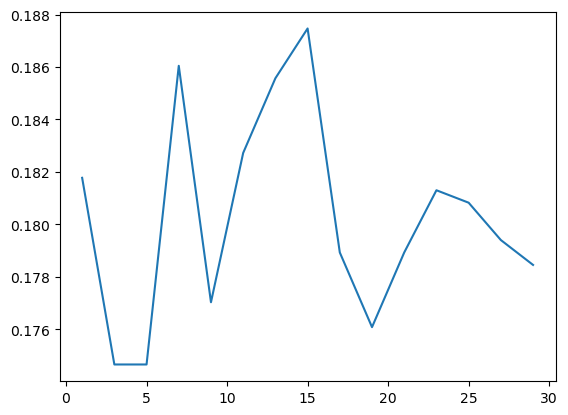

In [69]:
plt.plot(n_neighbours, accuracy)